In [ ]:
#install the dependencies
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavanikalyanipedda","key":"03ee0cdf2358c207b84cb43f8a7cd3e6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 74% 49.0M/66.0M [00:00<00:00, 48.9MB/s]
100% 66.0M/66.0M [00:00<00:00, 79.8MB/s]


In [ ]:
#extract zip
from zipfile import ZipFile
file_name = "creditcardfraud.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')



Done


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil import parser


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder	
from sklearn.metrics import confusion_matrix

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


RANDOM_SEED = 42


import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
data = pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

**Exploratory Data Analysis**

In [ ]:

data.describe().round(decimals=2)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#check null values in dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#Class count
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

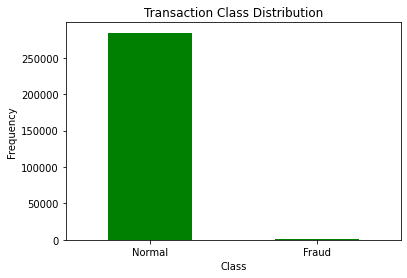

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0,color='g')

plt.title("Transaction Class Distribution")

LABELS = ["Normal", "Fraud"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

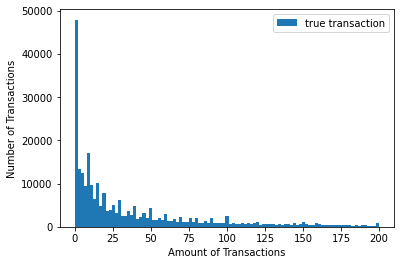

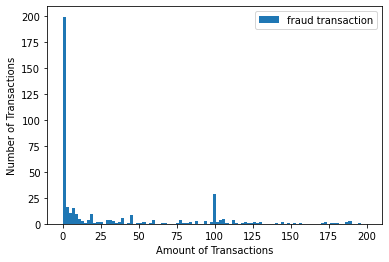

In [ ]:
normal= data[data['Class']==0]
fraud= data[data['Class']==1] 
bins = np.linspace(0,200,100)

plt.hist(normal.Amount,bins,label='true transaction')
plt.legend(loc="upper right")
plt.xlabel('Amount of Transactions')
plt.ylabel('Number of Transactions')
plt.show()

plt.hist(fraud.Amount,bins,label='fraud transaction')
plt.legend(loc="upper right")
plt.xlabel('Amount of Transactions')
plt.ylabel('Number of Transactions')
plt.show()

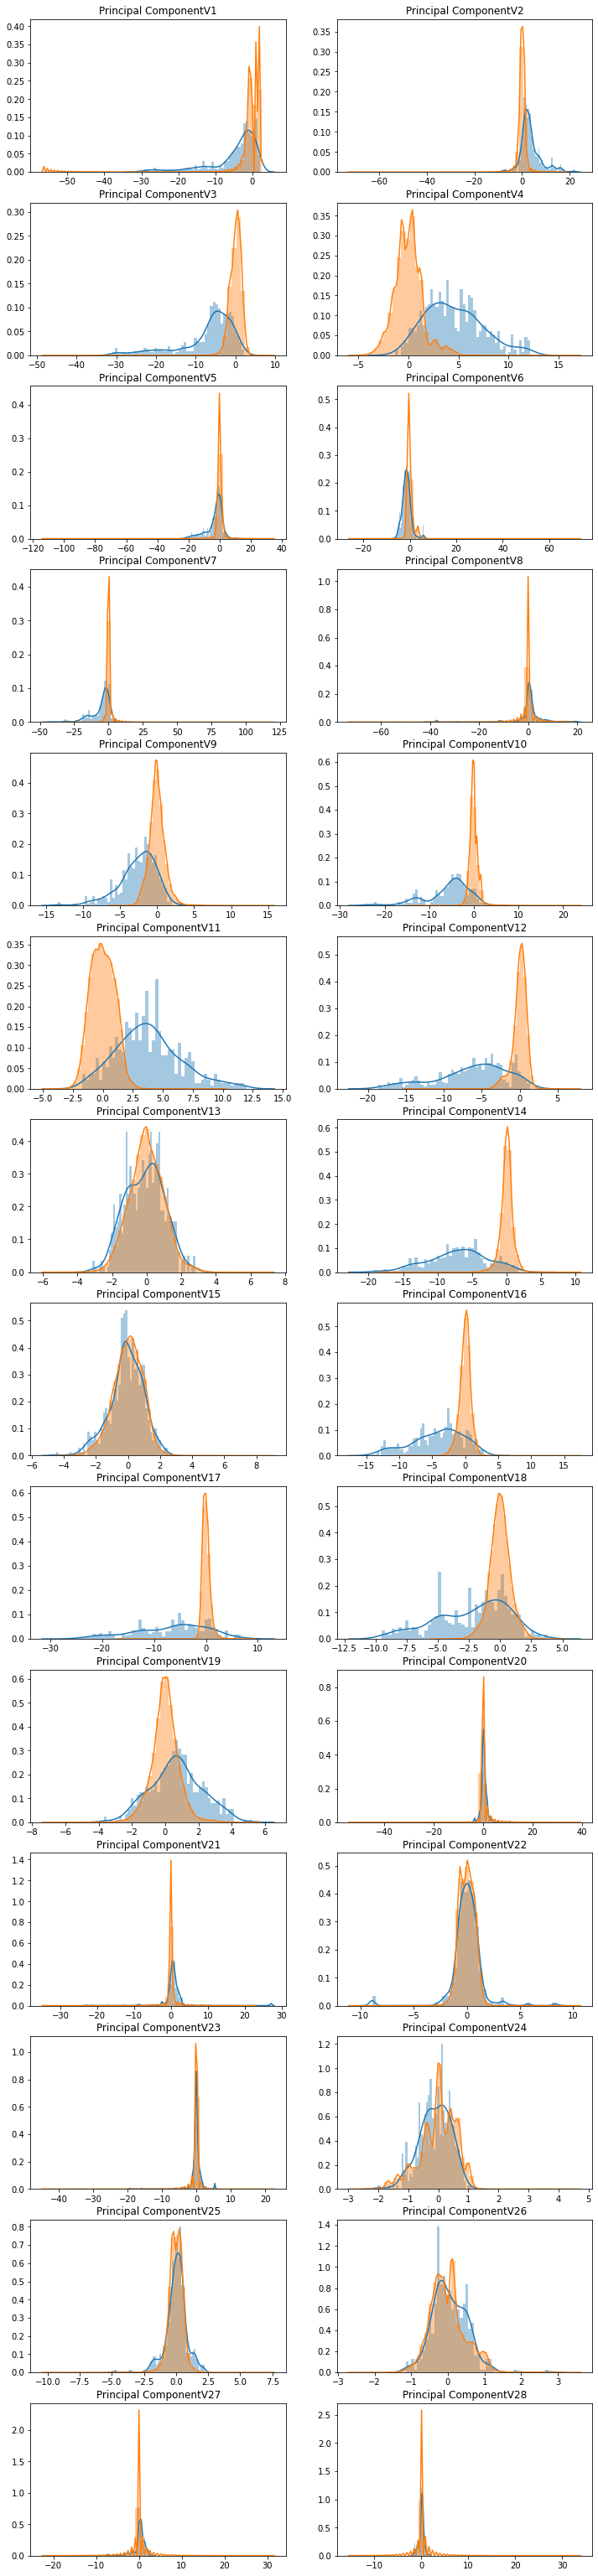

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
plt.figure(figsize=(12,28*4))
pc = gs.GridSpec(28,2)
for i,j in enumerate(data[data.iloc[:,1:29].columns]):
  ax = plt.subplot(pc[i])
  sns.distplot(data[j][data.Class == 1], bins=50)
  sns.distplot(data[j][data.Class == 0], bins=50)
  ax.set_xlabel('')
  ax.set_title('Principal Component' + str(j))
plt.show()

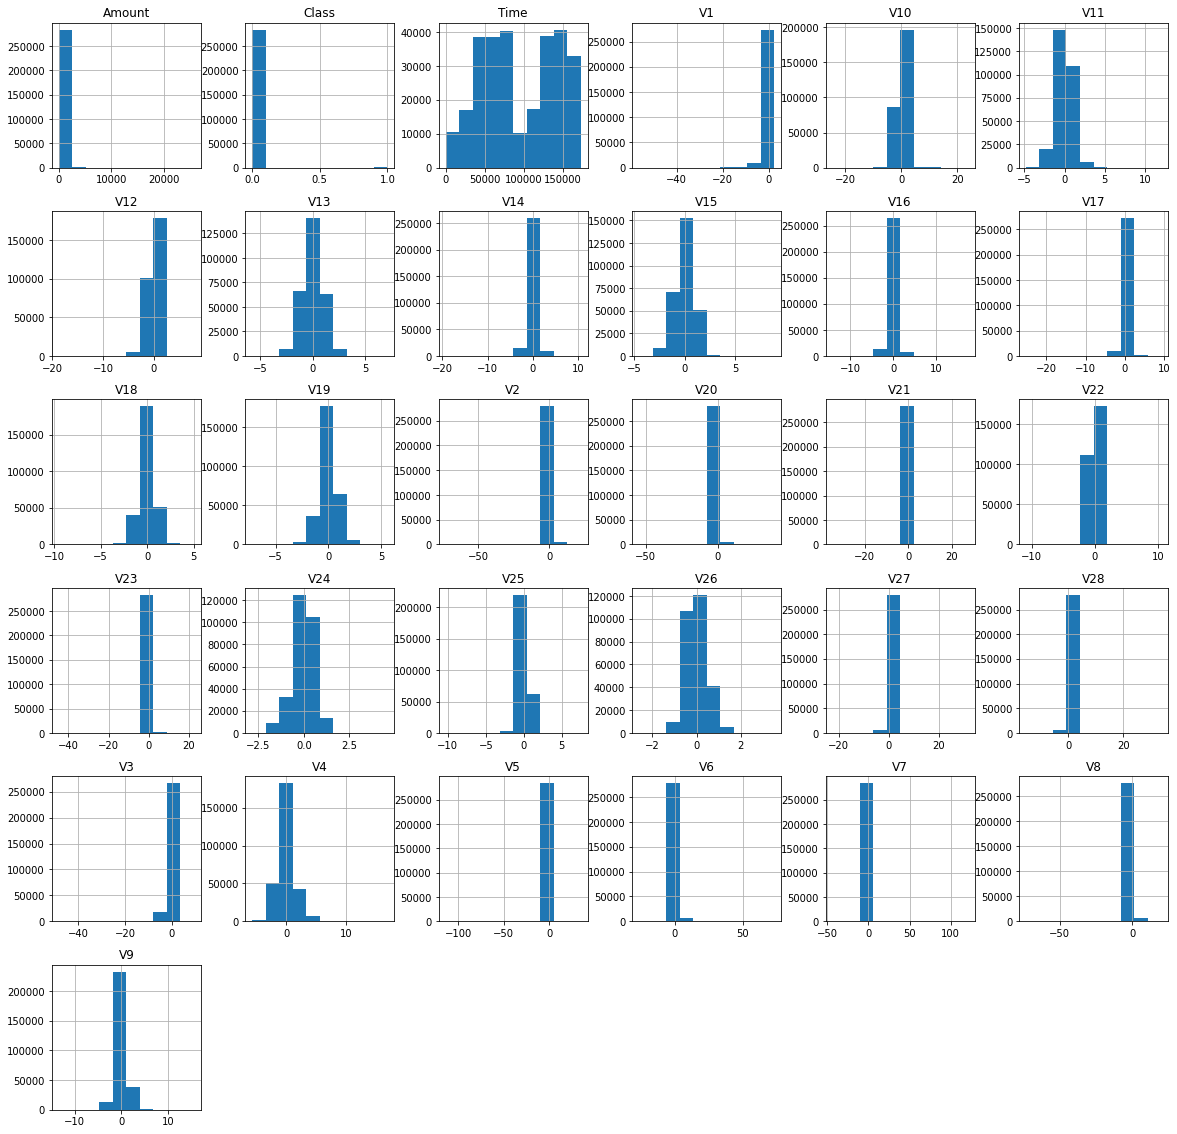

In [ ]:
data.hist(figsize=(20,20))
plt.show()

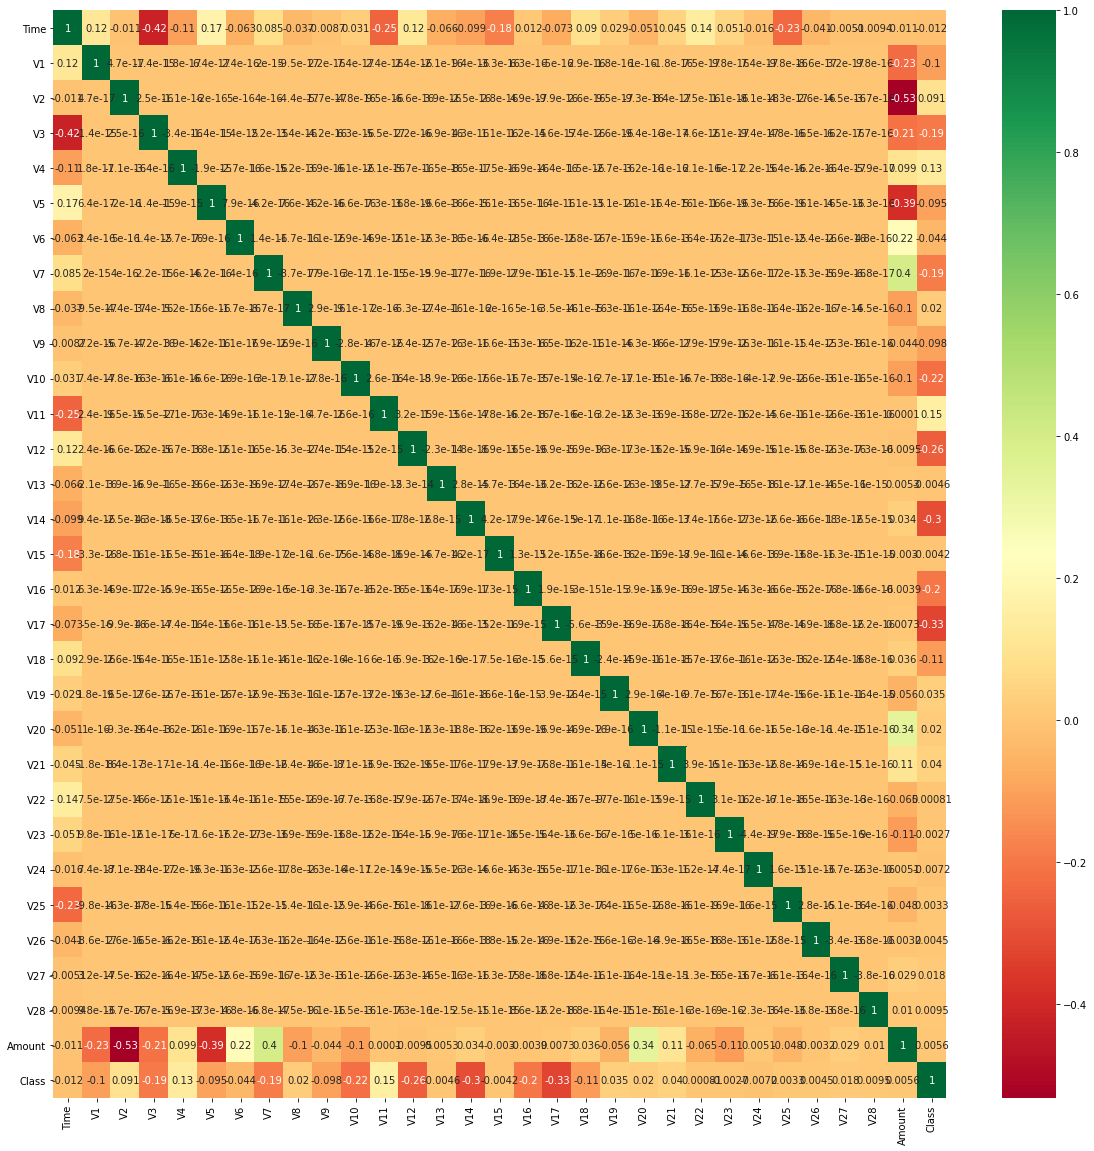

In [ ]:
# A beautiful correlation matrix using seaborn 
#create high quality heatmaps
fig, ax=plt.subplots(figsize=(20,20)) #using this we fig size
sns.heatmap(data.corr() ,annot=True, ax=ax,cmap="RdYlGn") #here annot gives numbers in the plot

**Feature Scaling**

**Separating the Feature and Target Matrices**

In [ ]:
#Separating Feature and Target matrices
X = data.drop(['Class'], axis=1)
Y=data['Class']

## Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.



In [ ]:
#selecting features using SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.feature_selection import chi2 // in dataset we have negative values so itsnot applicable
 #separating the featursand labels 
# X=data.iloc[:, :-1]  # x denotes the feature columns
# Y=data.iloc[:,-1]   #y denotes the labels


In [ ]:
#apply SelectKBest class to extract top 10 best features
k = 10 #no. of best features
k_best = SelectKBest(f_classif, k=k) #calculating the scores for each feature using the f_classif score function
fit = k_best.fit(X,Y)  



In [ ]:
#apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(x,y)


In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['independet features','Score']  #naming the dataframe columns

In [ ]:
featureScores

,independet features,Score
0,Time,43.252998
1,V1,2955.668946
2,V2,2393.401678
3,V3,11014.508305
4,V4,5163.832114
5,V5,2592.357929
6,V6,543.510578
7,V7,10349.605408
8,V8,112.548287
9,V9,2746.600273


In [ ]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   independet features         Score
17                 V17  33979.168593
14                 V14  28695.547788
12                 V12  20749.822361
10                 V10  14057.979985
16                 V16  11443.349428
3                   V3  11014.508305
7                   V7  10349.605408
11                 V11   6999.355047
4                   V4   5163.832114
18                 V18   3584.380605


In [ ]:
#seeing which feature is among the k-best or not 
mask = k_best.get_support()
mask



array([False, False, False,  True,  True, False, False,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
not_mask = np.logical_not(mask)
not_mask


array([ True,  True,  True, False, False,  True,  True, False,  True,
        True, False, False, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
#classifying features as best and bad features
all_features = np.array(list(X))

best_features = all_features[mask]
bad_features = all_features[not_mask]

print('Best Features : ', best_features)
print('Bad Features : ', bad_features)

Best Features :  ['V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']
Bad Features :  ['Time' 'V1' 'V2' 'V5' 'V6' 'V8' 'V9' 'V13' 'V15' 'V19' 'V20' 'V21' 'V22'
 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount']


In [ ]:
#visualizing the best and bad features using seaborn

def plot_fraud_genuine(features, data):
    plt_index = 0
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(top = 0.99, bottom= 0.01, hspace=1.5, wspace=0.4)
    
    for feature in features:
        plt_index += 1
        feature_data = pd.concat([data[feature], data['Class']], axis=1)
        fraud = feature_data[data['Class']==1]
        genuine = feature_data[data['Class']==0]
        if len(genuine>10000):
            genuine = genuine[::100]
        plt.subplot(5,5, plt_index)
        sns.distplot(fraud[feature])
        sns.distplot(genuine[feature])
        plt.title(feature)

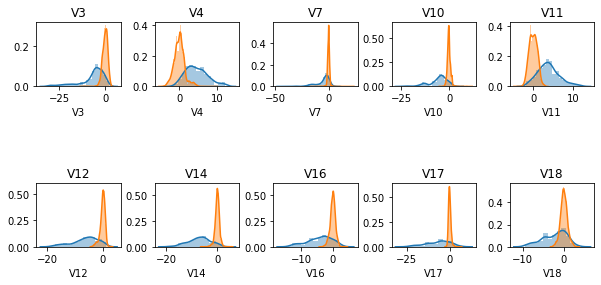

In [ ]:
plot_fraud_genuine(best_features, data)

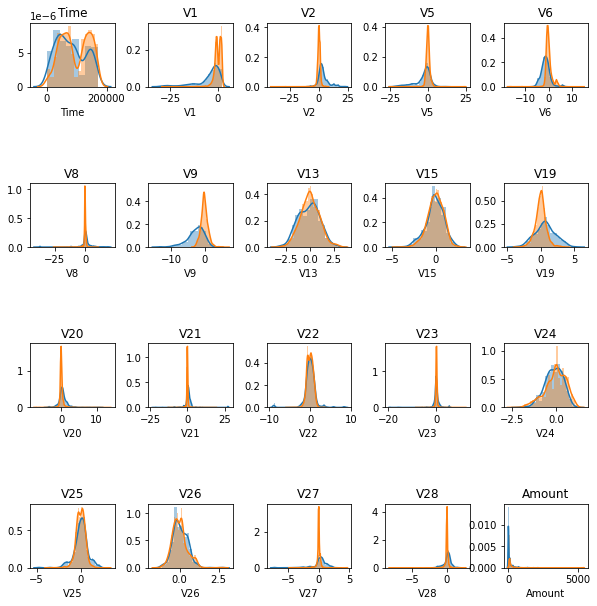

In [ ]:
plot_fraud_genuine(bad_features, data)

**Dropping the bad features from X**

In [ ]:
# Separating the Feature and Target Matrices
best = X.drop(bad_features, axis=1)
target = Y
best.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


In [ ]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### **Scaling the data values to standardize the range of independent variables**

In [ ]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(best)

In [ ]:
print(x)

[[ 1.6727735   0.97336551  0.19367894 ... -0.53683287  0.24486345
   0.03076993]
 [ 0.1097971   0.31652293 -0.06370021 ...  0.52943375 -0.13516997
  -0.21876258]
 [ 1.16946849  0.26823129  0.63977564 ... -3.29823537  1.30686788
  -0.14478999]
 ...
 [-2.14320514 -0.39398367 -0.23993904 ...  0.1605886   0.36911416
   0.47204057]
 [ 0.46332013  0.48719238 -0.55467201 ... -0.69452347  0.60038514
   1.32905531]
 [ 0.46386564 -0.35757     1.27476937 ... -0.34535763 -0.77752147
   0.1997554 ]]


**Since the data is highly class imbalanced, we will have to oversample the data. Here SMOTE technique has been used to oversample the data as it proves to be the most effective one.**

**Over Sample**

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
best_res,target_res=smk.fit_sample(best,target) #res - resample


In [ ]:
best_res.shape, target_res.shape

((568630, 10), (568630,))

In [ ]:

from collections import Counter
print('Original dataset shape of Class(y) {}'.format(Counter(target)))
print('Resampled dataset shape of Class(y) {}'.format(Counter(target_res)))


Original dataset shape of Class(y) Counter({0: 284315, 1: 492})
Resampled dataset shape of Class(y) Counter({0: 284315, 1: 284315})


Text(0, 0.5, 'Frequency')

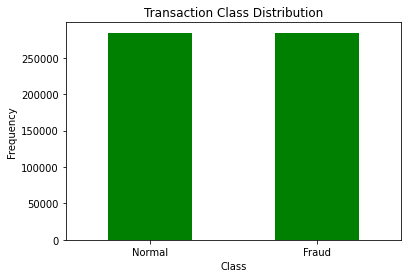

In [ ]:
count_classes1 = pd.value_counts(target_res, sort = True)

count_classes1.plot(kind = 'bar', rot=0,color='g')

plt.title("Transaction Class Distribution")

LABELS = ["Normal", "Fraud"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
# # A beautiful correlation matrix using seaborn 
# #create high quality heatmaps
# fig, ax=plt.subplots(figsize=(40,20)) #using this we fig size
# sns.heatmap(data.corr() ,annot=True, ax=ax) #here annot gives numbers in the plot

**K Fold validation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores1 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),best_res, target_res, cv=10)
np.average(scores1)

0.9349366020083357

In [ ]:
#scores2 = cross_val_score(SVC(kernel='linear'),best_res, target_res, cv=10)
#np.average(scores2)


In [ ]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=10),best_res, target_res, cv=10)
np.average(scores3)

0.9995005539630339

In [ ]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=20), best_res, target_res,cv=10)
np.average(scores4)

0.9995638640240578

In [ ]:
scores5 = cross_val_score(RandomForestClassifier(n_estimators=30),best_res, target_res, cv=10)
np.average(scores5)

0.9995955190545699

In [ ]:
scores6 = cross_val_score(RandomForestClassifier(n_estimators=40),best_res, target_res, cv=10)
np.average(scores6)

0.9995585881856393

In [ ]:
scores7 = cross_val_score(RandomForestClassifier(n_estimators=50),best_res, target_res, cv=10)
np.average(scores7)

0.9995884846033449

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score8 = cross_val_score(KNeighborsClassifier(n_neighbors = 10),best_res, target_res,cv=10)
np.average(score8)

0.9963948437472523

In [ ]:
score9 = cross_val_score(KNeighborsClassifier(n_neighbors = 20),best_res, target_res,cv=10)
np.average(score9)

0.9944005768250005

In [ ]:
score10 = cross_val_score(KNeighborsClassifier(n_neighbors = 30),best_res, target_res,cv=10)
np.average(score10)

0.9929848935159946

In [ ]:
score11 = cross_val_score(KNeighborsClassifier(n_neighbors = 40),best_res, target_res,cv=10)
np.average(score11)

0.9918875191249142

In [ ]:

from sklearn.tree import DecisionTreeClassifier
score5 = cross_val_score(DecisionTreeClassifier(),best_res, target_res,cv=10)
np.average(score5)


0.9972266676045937

**Using oversampling data to all alogorithms to predict the data**

**best_res and target_res dataset resampled one**

In [ ]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(best_res,target_res,test_size =0.3,random_state=42)

### **Function definition**

In [ ]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [ ]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    print(cm[1][0])

### **PERFORM PREDICTIONS USING MACHINE LEARNING ALGORITHMS**

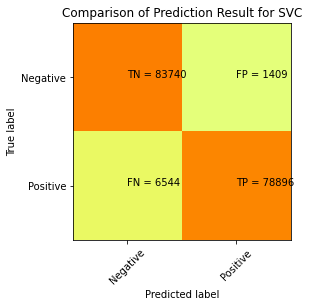

6544
Accuracy of the Model SVC 95.3%


In [ ]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "SVC"
model=SVC() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_SVC=np.array(model.predict(X_test))
print('SVC:')
print(classification_report(y_test,y_pred_SVC))

In [ ]:
#from sklearn.svm import SVC,NuSVC  #Import packages related to Model
#Model = "NuSVC"
#model=NuSVC()#Create the Model

#train_test_ml_model(X_train,y_train,X_test,Model)

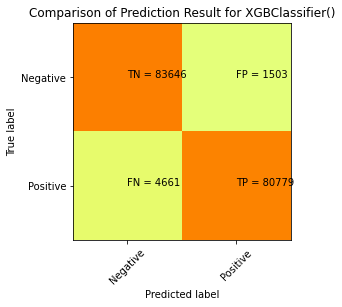

4661
Accuracy of the Model XGBClassifier() 96.4%


In [ ]:
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
model=XGBClassifier() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_XGB=np.array(model.predict(X_test))
print('XGBClassifier:')
print(classification_report(y_test,y_pred_XGB))

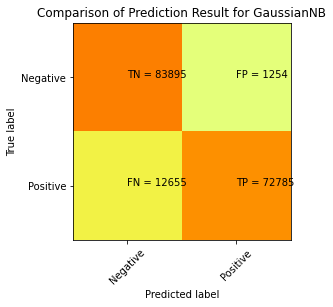

12655
Accuracy of the Model GaussianNB 91.8%


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)


#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_GNB=np.array(model.predict(X_test))
print('GaussianNB:')
print(classification_report(y_test,y_pred_GNB))


In [ ]:
# from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
# Model = "SGDClassifier"
# model=SGDClassifier()

# train_test_ml_model(X_train,y_train,X_test,Model)

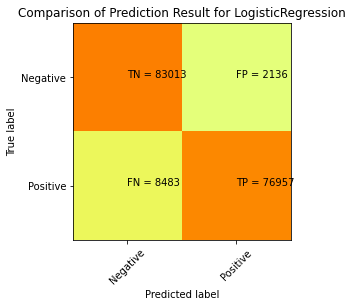

8483
Accuracy of the Model LogisticRegression 93.8%


In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

 Regresssion Classreport
from sklearn.metrics import classification_report
y_pred_log=np.array(model.predict(X_test))
print('Logistic Regression:')
print(classification_report(y_test,y_pred_log))

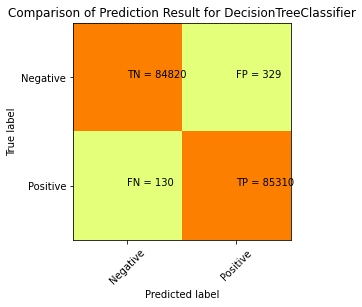

130
Accuracy of the Model DecisionTreeClassifier 99.7%


In [ ]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_DT=np.array(model.predict(X_test))
print('Decision Tree:')
print(classification_report(y_test,y_pred_DT))

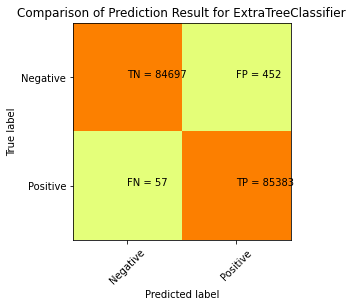

57
Accuracy of the Model ExtraTreeClassifier 99.7%


In [ ]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_EX=np.array(model.predict(X_test))
print('ExtraTreeClassifier :')
print(classification_report(y_test,y_pred_EX))

In [ ]:
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
# Model = "QuadraticDiscriminantAnalysis"
# model = QuadraticDiscriminantAnalysis()

# train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
# Model = "LinearDiscriminantAnalysis"
# model=LinearDiscriminantAnalysis()

# train_test_ml_model(X_train,y_train,X_test,Model)

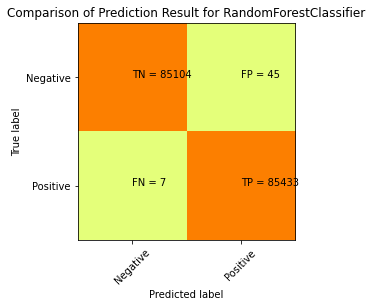

7
Accuracy of the Model RandomForestClassifier 100.0%


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_RN=np.array(model.predict(X_test))
print('RandomForest:')
print(classification_report(y_test,y_pred_RN))

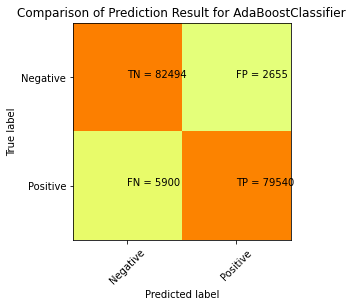

5900
Accuracy of the Model AdaBoostClassifier 95.0%


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_ADC=np.array(model.predict(X_test))
print('AdaBoostClassifier:')
print(classification_report(y_test,y_pred_ADC))

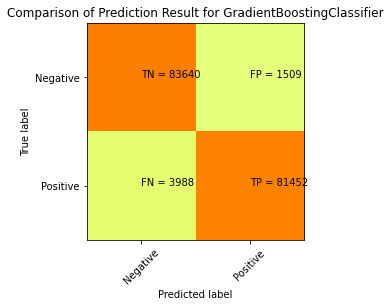

3988
Accuracy of the Model GradientBoostingClassifier 96.8%


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_GBC=np.array(model.predict(X_test))
print('GradientBoostingClassifier:')
print(classification_report(y_test,y_pred_GBC))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
y_pred_KNC=np.array(model.predict(X_test))
print('KNeighborsClassifier:')
print(classification_report(y_test,y_pred_KNC))